<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
URL2 = 'https://lib.stat.cmu.edu/datasets/boston'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Text(0.5, 0, '')

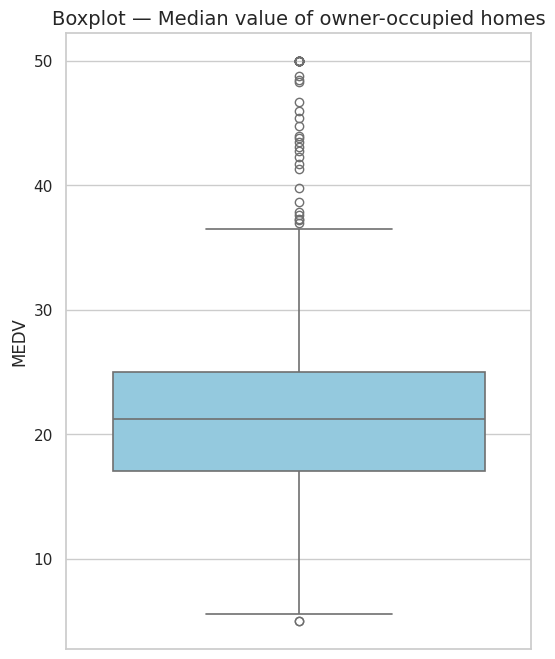

In [9]:
sns.set(style="whitegrid")
pyplot.figure(figsize=(6, 8))
ax = sns.boxplot(y=boston_df['MEDV'], color="skyblue", linewidth=1.2)
ax.set_title(f"Boxplot — Median value of owner-occupied homes", fontsize=14)
ax.set_ylabel(f"MEDV", fontsize=12)
ax.set_xlabel(f"")  # no x label necessary for single vertical boxplot

Text(0, 0.5, 'Count of properties')

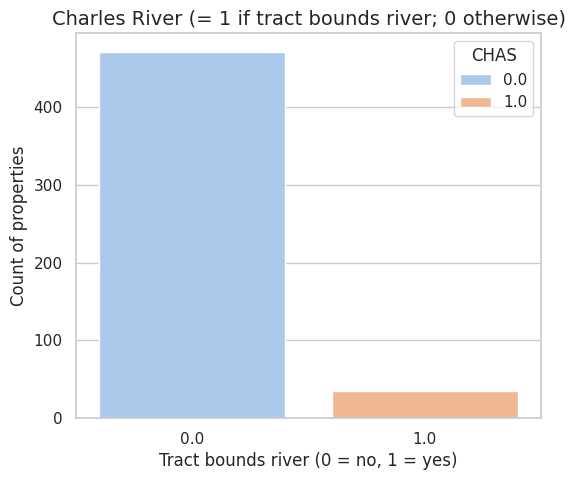

In [6]:
sns.set(style="whitegrid")
pyplot.figure(figsize=(6, 5))
ax = sns.countplot(x=boston_df['CHAS'], palette="pastel", hue=boston_df['CHAS'])
ax.set_title(f"Charles River (= 1 if tract bounds river; 0 otherwise)", fontsize=14)
ax.set_xlabel(f"Tract bounds river (0 = no, 1 = yes)", fontsize=12)
ax.set_ylabel(f"Count of properties", fontsize=12)

In [7]:
sns.set(style="whitegrid")
pyplot.figure(figsize=(8, 6))

bins = [0, 35, 70, float('inf')]
labels = ['35 and younger', '36 to 69', '70 and older']
df = pd.DataFrame(boston_df['AGE'])
# Discretize the age variable
df['age_group'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=True)

<Figure size 800x600 with 0 Axes>

Text(0, 0.5, 'MEDV (Median value of owner-occupied homes)')

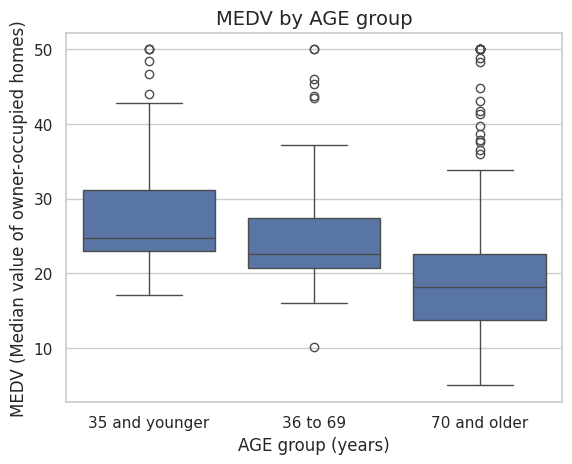

In [8]:
ax = sns.boxplot(x=df['age_group'], y=boston_df['MEDV'], data=df, showfliers=True)
ax.set_title("Boxplot - MEDV by AGE group", fontsize=14)
ax.set_xlabel("AGE group (years)", fontsize=12)
ax.set_ylabel("MEDV (Median value of owner-occupied homes)", fontsize=12)

<AxesSubplot:title={'center':'NOX vs INDUS — Nitric oxide concentration vs non-retail business acres'}, xlabel='NOX', ylabel='INDUS'>

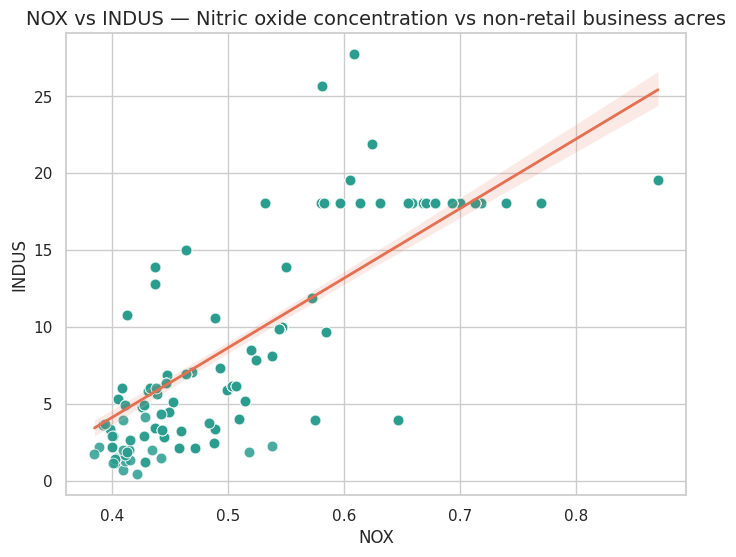

In [12]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
sns.set(style="whitegrid")
pyplot.figure(figsize=(8,6))
ax = sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'], data=boston_df, s=60, color="#2A9D8F", edgecolor="w", alpha=0.85)
ax.set_title("NOX vs INDUS — Nitric oxide concentration vs non-retail business acres", fontsize=14)
ax.set_xlabel("INDUS (proportion of non-retail business acres per town)", fontsize=12)
ax.set_ylabel("NOX (nitric oxides concentration, parts per 10 million)", fontsize=12)
# Add regression line
sns.regplot(x=boston_df['NOX'], y=boston_df['INDUS'], data=boston_df, scatter=False, ax=ax, color="#E76F51", line_kws={"linewidth":2})

Text(0, 0.5, 'Count')

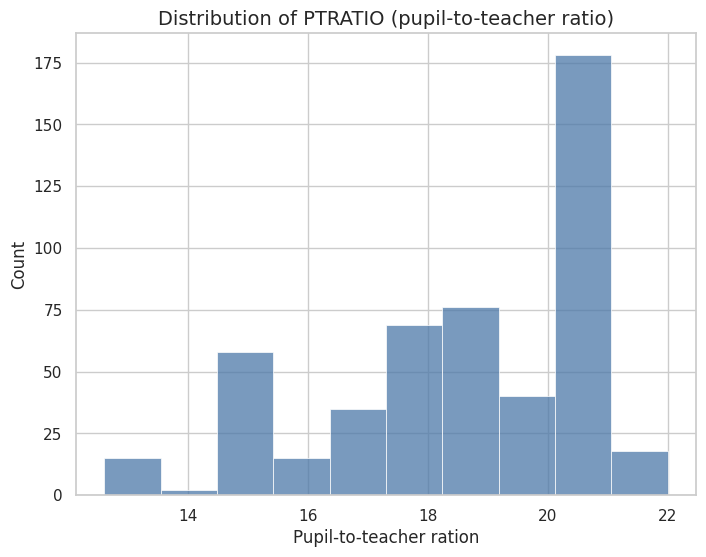

In [17]:
sns.set(style="whitegrid")
pyplot.figure(figsize=(8,6))
ax = sns.histplot(data=boston_df['PTRATIO'], bins=10, color="#4C78A8", edgecolor="w", linewidth=0.5)
ax.set_title("Distribution of PTRATIO (pupil-to-teacher ratio)", fontsize=14)
ax.set_xlabel("Pupil-to-teacher ration", fontsize=12)
ax.set_ylabel("Count", fontsize=12)